<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/QUAD/QUAD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: High Performance Data Processing
This is the starter notebook for the case study project. You will pick a real-world dataset of your choice and apply the concepts learned in this topic. Use this starter notebook as an outline for your project. Focus on documentation and presentation - this Jupyter notebook will also serve as a project report, so make sure to include detailed explanations wherever possible using Markdown cells.

Intructions
This project must be completed groups (max 4 students in a group).
You need to use a dataset that is larger than 1 GB. You can get the dataset from Kaggle or Dataset Search. The dataset file must be of CSV type.
The dataset must be stored in Google Drive.
Make sure you create a link to enable your dataset to be used on Google Colab.
Please create operations related to big data that allow the dataset to be used.
You need to use at least three libraries related to big data processing such as pandas, dask, vaex and mondin.
Please compare the processing results from the selected libraries.
You need to use the concept of Exploratory Data Analysis (EDA) on this project.
Submission
You need to send the *.pynb file. Make sure you have linked Google Colab with your dataset (Google Drive).
Save your file on Github. Make sure it can be opened in Google Colab by using Open In Colab
Please submit it via e-learning.
Evaluation Criteria
Your submission will be evaluated using the following criteria:

Dataset must contain at least larger than 1 GB
Please implement data processing related to the concept of big data.
You must ask and answer at least 5 questions about the dataset
Your submission must include explanations using markdown cells, apart from the code.
Your work must not be plagiarized i.e. copy-pasted from somewhere else.

# Project Title: **nyc-yellow-taxi-trip-data**

Sources: [Kaggle](https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data)

Data Collection:
In this dataset, we have collected the data for 4 months particularly:
- Jan 2015: 1.99 GB
- Jan 2016: 1.71 GB
- Feb 2016: 1.78 GB
- Mar 2016: 1.91 GB

In this notebook, we use 'yellow_tripdata_2015-01.csv'. This dataset contain 12748986 records and 19 columns. The variables are:

| Field Name	| Description |
|-------------|-------------|
|VendorID |	A code indicating the TPEP provider that provided the record (Creative Mobile Technologies & VeriFone Inc. )|
|tpep_pickup_datetime	| The date and time when the meter was engaged. |
|tpep_dropoff_datetime	| The date and time when the meter was disengaged. |
| Passenger_count |	The number of passengers in the vehicle. This is a driver-entered value. |
| Trip_distance |	The elapsed trip distance in miles reported by the taximeter.|
| Pickup_longitude	| Longitude where the meter was engaged. |
| Pickup_latitude	| Latitude where the meter was engaged. |
| RateCodeID |	The final rate code in effect at the end of the trip. |
|Store_and_fwd_flag |	This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. (Y= store and forward trip N= not a store and forward trip ) |
| Dropoff_longitude	| Longitude where the meter was disengaged. |
| Dropoff_ latitude |	Latitude where the meter was disengaged. |
| Payment_type |	A numeric code signifying how the passenger paid for the trip. |
| Fare_amount |	The time-and-distance fare calculated by the meter. |
| Extra |	Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges. |
| MTA_tax	| 0.50 MTA tax that is automatically triggered based on the metered rate in use. |
| Improvement_surcharge	| 0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015. |
| Tip_amount |	Tip amount – This field is automatically populated for credit card tips.Cash tips are not included. |
| Tolls_amount |	Total amount of all tolls paid in trip. |
| Total_amount |	The total amount charged to passengers. Does not include cash tips. |

<br></br>
## 🚀 Group Members QUAD (Team 8)
> 1. CHONG KAI ZHE (A20EC0186)
> 2. TERENCE A/L LOORTHANATHAN (A20EC0165)
> 3. RISHMA FATHIMA BINTI BASHER (A20EC0137)
> 4. NUR SYAMALIA FAIQAH BINTI MOHD KAMAL (A20EC0118)

# Downloading the Dataset

Install Polars

In [ ]:
!pip install 'polars[all]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 6.7 MB/s eta 0:00:00


Install Koalas

In [ ]:
!pip install koalas
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 8.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=083b32c3e9868f221b4acf14c72af5a1975db56520dbf17197616dc1b2c1bb6a
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


Installing Datatable 

In [ ]:
!pip install datatable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 MB 9.9 MB/s eta 0:00:00


Installing dataset from Google Drive

In [ ]:
# Pull dataset from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1G0lX1F2ug-DdRw6hbwnSwgmef9z12lMg/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('yellow_tripdata_2015-01.csv') 

Importing all libraries

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import polars as pl
import databricks.koalas as ks
import datatable as dt
from datatable import *

# Libraries for visualization
import matplotlib.pyplot as plt

Library 1: Polars

In [ ]:
#Read data.csv file using Polars
%time pldf = pl.read_csv('yellow_tripdata_2015-01.csv')

CPU times: user 23.4 s, sys: 8.2 s, total: 31.6 s
Wall time: 19.3 s


Library 2: Koalas


In [ ]:
#Read data.csv file using koalas
%time kdf = ks.read_csv('yellow_tripdata_2015-01.csv')

CPU times: user 562 ms, sys: 206 ms, total: 769 ms
Wall time: 1min 9s


Library 3: Datatable

In [ ]:
#Reading the dataset using datatable
%time dtdf = dt.fread("yellow_tripdata_2015-01.csv")

CPU times: user 11 s, sys: 2.37 s, total: 13.4 s
Wall time: 12.1 s


# Data Preparation and Cleaning

## Viewing data


Library 1: Polars

In [ ]:
#See the top rows of the frame
%time pldf.head()

CPU times: user 116 µs, sys: 0 ns, total: 116 µs
Wall time: 120 µs


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
2,"""2015-01-15 19:...","""2015-01-15 19:...",1,1.59,-73.993896,40.750111,1,"""N""",-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,3.3,-74.001648,40.724243,1,"""N""",-73.994415,40.759109,1,14.5,0.5,0.5,2.0,0.0,0.3,17.8
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,1.8,-73.963341,40.802788,1,"""N""",-73.95182,40.824413,2,9.5,0.5,0.5,0.0,0.0,0.3,10.8
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,0.5,-74.009087,40.713818,1,"""N""",-74.004326,40.719986,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,3.0,-73.971176,40.762428,1,"""N""",-74.004181,40.742653,2,15.0,0.5,0.5,0.0,0.0,0.3,16.3


Library 2: Koalas


In [ ]:
#See the top rows of the frame
%time kdf.head()

CPU times: user 25.7 ms, sys: 4.9 ms, total: 30.6 ms
Wall time: 169 ms


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


Library 3: Datatable

In [ ]:
#See the top 5 rows of the frame
%time dtdf.head(5)

## Getting Dataframe Information

Library 1: Polars

In [ ]:
%time pldf.dtypes

CPU times: user 135 µs, sys: 0 ns, total: 135 µs
Wall time: 141 µs


[Int64,
 Utf8,
 Utf8,
 Int64,
 Float64,
 Float64,
 Float64,
 Int64,
 Utf8,
 Float64,
 Float64,
 Int64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64]

Library 2: Koalas


In [ ]:
%time kdf.dtypes

CPU times: user 9.71 ms, sys: 0 ns, total: 9.71 ms
Wall time: 26.7 ms


VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int32
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int32
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int32
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

Library 3: Datatable

In [ ]:
%time column_types = dtdf.stypes

A much better version visually of getting datatypes of each column using datatable is as follows:

In [ ]:
# Create a dictionary mapping column names to their data types
column_types = {name: stype for name, stype in zip(dtdf.names, dtdf.stypes)}

# Print the column types
column_types

{'VendorID': stype.int32,
 'tpep_pickup_datetime': stype.time64,
 'tpep_dropoff_datetime': stype.time64,
 'passenger_count': stype.int32,
 'trip_distance': stype.float64,
 'pickup_longitude': stype.float64,
 'pickup_latitude': stype.float64,
 'RateCodeID': stype.int32,
 'store_and_fwd_flag': stype.str32,
 'dropoff_longitude': stype.float64,
 'dropoff_latitude': stype.float64,
 'payment_type': stype.int32,
 'fare_amount': stype.float64,
 'extra': stype.float64,
 'mta_tax': stype.float64,
 'tip_amount': stype.float64,
 'tolls_amount': stype.float64,
 'improvement_surcharge': stype.float64,
 'total_amount': stype.float64}

## Handling missing data


Library 1: Polars

In [ ]:
# Drop any rows that have missing data.
%time pldf = pldf.drop_nulls()

CPU times: user 743 ms, sys: 1.51 s, total: 2.25 s
Wall time: 1.39 s


In [ ]:
pldf.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
2,"""2015-01-15 19:...","""2015-01-15 19:...",1,1.59,-73.993896,40.750111,1,"""N""",-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,3.3,-74.001648,40.724243,1,"""N""",-73.994415,40.759109,1,14.5,0.5,0.5,2.0,0.0,0.3,17.8
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,1.8,-73.963341,40.802788,1,"""N""",-73.95182,40.824413,2,9.5,0.5,0.5,0.0,0.0,0.3,10.8
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,0.5,-74.009087,40.713818,1,"""N""",-74.004326,40.719986,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,3.0,-73.971176,40.762428,1,"""N""",-74.004181,40.742653,2,15.0,0.5,0.5,0.0,0.0,0.3,16.3


Library 2: Koalas


In [ ]:
# Drop any rows that have missing data.
%time kdf = kdf.dropna()

CPU times: user 201 ms, sys: 25.7 ms, total: 227 ms
Wall time: 1.11 s


In [ ]:
kdf.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


Library 3: Datatable

In [ ]:
missing_values = dt.isna(dtdf).sum().sum()
print(f"Number of missing values before operation: {missing_values}")


# Drop rows that contain missing values
# Loop through each column and drop the missing values
for i in range(dtdf.ncols):
    if dt.isna(dtdf[:, i]):
      mask = dt.isna(dtdf[:, i])
      del dtdf[mask, :]

missing_values = dt.isna(dtdf).sum().sum()
print(f"Number of missing values after operation: {missing_values}")

Number of missing values before operation:    | VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  pickup_longitude  pickup_latitude  RateCodeID  store_and_fwd_flag  dropoff_longitude  …  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount
   |  float64               float64                float64          float64        float64           float64          float64     float64             float64            float64     float64     float64       float64                float64       float64
-- + --------  --------------------  ---------------------  ---------------  -------------  ----------------  ---------------  ----------  ------------------  -----------------     -------  ----------  ------------  ---------------------  ------------
 0 |        0                     0                      0                0              0                 0                0           0                   0                  0  …        0           0 

# Exploratory Analysis and Visualization

## Grouping and Operations

Library 1: Polars

In [ ]:
# Grouping and then applying the sum() function to the resulting groups using koalas
%time pldf.groupby('passenger_count').sum()

CPU times: user 1.38 s, sys: 82 ms, total: 1.46 s
Wall time: 1.4 s


passenger_count,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
i64,i64,str,str,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
5,1391726,null,null,1.9926e6,-5.1224e7,2.8219e7,713918,null,-5.1205e7,2.8208e7,960976,8.3463e6,218507.5,347857.5,1.0755e6,179941.27,208379.700001,1.0377e7
2,2767584,null,null,3.2737e7,-1.3178e8,7.2591e7,1890843,null,-1.3189e8,7.2656e7,2551700,2.2538e7,583129.58,902644.5,2.7964e6,541015.06,503809.799992,2.7905e7
9,20,null,null,79.96,-665.579994,366.885517,47,null,-813.91333,448.41341,14,581.9,1.0,4.5,75.2,24.99,2.7,690.89
1,13073647,null,null,1.3334e8,-6.5137e8,3.5883e8,9325958,null,-6.5184e8,3.5909e8,12402358,1.0597e8,2.7386e6,4477080.5,1.7968e7,2.0696e6,2.5449e6,1.3591e8
6,908331,null,null,1.2676e6,-3.3378e7,1.8388e7,464410,null,-3.3367e7,1.8382e7,628713,5362855.3,131786.0,226755.0,684431.76,108908.58,135804.600001,6.6506e6
3,849055,null,null,1.5076e6,-3.8460e7,2.1186e7,546859,null,-3.8481e7,2.1199e7,753220,6.4077e6,173939.51,263037.0,760939.3,136146.5,146903.100001,7.9000e6
4,399713,null,null,727191.37,-1.8419e7,1.0146e7,262551,null,-1.8431e7,1.0153e7,372954,3.0899e6,82352.5,125920.0,339082.2,67775.19,68122.2,3.7809e6
0,6679,null,null,14197.78,-459919.288864,253360.366798,14792,null,-476624.64946,262571.974075,9207,73562.76,1967.0,3121.5,9441.92,958.96,1892.1,90999.44
8,17,null,null,21.79,-591.893723,326.018887,38,null,-665.638206,366.944695,13,295.8,1.0,3.0,12.09,9.75,2.4,324.64


In [ ]:
%%time
from polars import col
trip_dist= pldf.lazy().sort(col("trip_distance"), reverse = True)
trip_dist1=trip_dist.collect()
trip_dist1

CPU times: user 19.2 s, sys: 3.5 s, total: 22.7 s
Wall time: 12.9 s


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
1,"""2015-01-11 21:...","""2015-01-11 22:...",1,1.5420e7,-73.992233,40.729248,1,"""N""",-74.028084,40.622639,2,34.5,0.5,0.5,0.0,0.0,0.3,35.8
1,"""2015-01-11 19:...","""2015-01-11 19:...",2,1.23318e7,-73.977341,40.749462,1,"""Y""",-74.00029,40.730511,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3
1,"""2015-01-02 15:...","""2015-01-02 15:...",1,1.2e7,-73.95916,40.771851,1,"""N""",-73.955093,40.782879,2,4.5,0.0,0.5,0.0,0.0,0.0,5.3
1,"""2015-01-23 15:...","""2015-01-23 16:...",1,1.1800e7,-73.98719,40.77087,1,"""N""",-73.873169,40.774391,2,2.5,1.0,0.5,0.0,0.0,0.3,4.3
1,"""2015-01-23 10:...","""2015-01-23 10:...",1,1.1800e7,-73.946815,40.780571,1,"""N""",-73.954597,40.789566,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3
1,"""2015-01-09 22:...","""2015-01-09 22:...",2,1.1800e7,-73.9935,40.762287,1,"""N""",-73.969383,40.795391,2,9.5,0.5,0.5,0.0,0.0,0.3,10.8
1,"""2015-01-09 21:...","""2015-01-09 21:...",1,8000016.5,-73.870872,40.773811,1,"""N""",-73.998283,40.694496,1,28.0,0.5,0.5,5.86,0.0,0.3,35.16
1,"""2015-01-09 22:...","""2015-01-09 23:...",1,8.00001e6,-73.987267,40.765903,1,"""N""",-73.955948,40.719486,2,21.0,0.5,0.5,0.0,0.0,0.3,22.3
1,"""2015-01-22 23:...","""2015-01-22 23:...",1,7468004.3,-74.003197,40.723087,1,"""N""",-73.898598,40.746029,2,29.5,0.5,0.5,0.0,0.0,0.3,30.8


Library 2: Koalas


In [ ]:
# Grouping and then applying the sum() function to the resulting groups using koalas
%time kdf.groupby('passenger_count').sum()

In [ ]:
%%time
kdf['trip_distance'].plot.box()


In [ ]:
%%time
s = kdf['passenger_count']
s.plot.hist() 

Library 3: Datatable

In [70]:
# Grouping and then applying the sum() function to the resulting groups using datatable
gb_dt = dtdf[:, dt.sum(dt.f.passenger_count), dt.by(dt.f.VendorID)]

In [71]:
gb_dt

,VendorID,passenger_count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,1,7710762
1,2,13726538


# Asking and Answering Questions

Q1: What are the comparison loading dataset between Polars, Koalas and Datatable in wall time?

      Polars  Koalas  Datatable
read    17.5      98         23


ValueError: ignored

<Figure size 576x432 with 0 Axes>

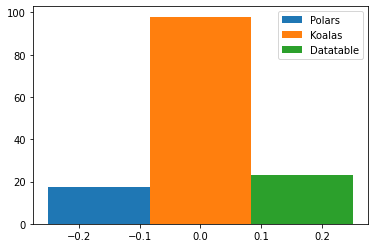

In [72]:
ops = ['read'] # List of one operations from each category

#Wall time recorded to execute read operation in terms of polars, koalas and datatable
plot = pd.DataFrame({'Polars': [17.5], 'Koalas': [98], 'Datatable': [23]}, index = ops) 
print(plot)


plt.figure(figsize=(8,6))
plot.loc[ops].plot(kind='bar', title=ops)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f470241f8e0>,
      dtype=object)

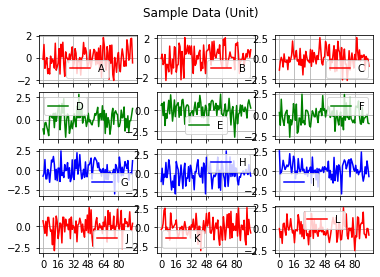

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import polars as pl
import databricks.koalas as ks
import datatable as dt
from datatable import *

# Libraries for visualization
import matplotlib.pyplot as plt

# Generate random data
df = pd.DataFrame(np.random.randn(96,12),
                  columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                           'K', 'L'])

# Plotting
df.plot(kind='line', subplots=True, grid=True, title="Sample Data (Unit)",
        layout=(4, 3), sharex=True, sharey=False, legend=True,    
        style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r'],
        xticks=np.arange(0, len(df), 16))

## Inferences and Conclusion
- Write a summary of what you've learned from the analysis.
- Share links to resources you found useful during your analysis
- Please suggest the best library based on your dataset.

# References and Future Work